In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=5e79e97eff9e405af33ba7260eca910cbff81ce603a0464bb19dff3624001a01
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


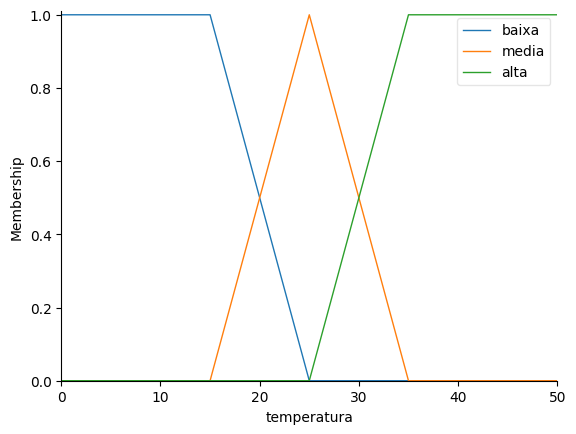

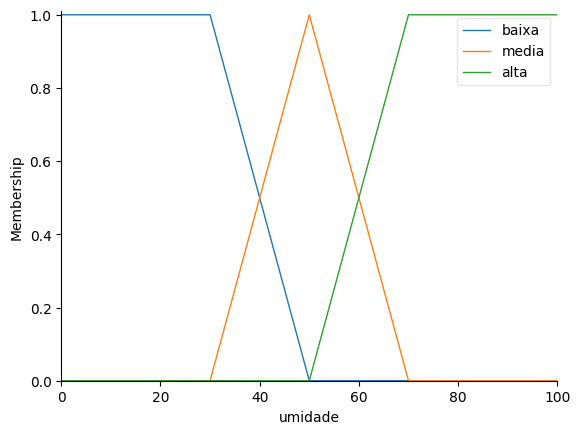

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
temperatura = ctrl.Antecedent(np.arange(0, 51, 1), 'temperatura')
umidade =ctrl.Antecedent(np.arange(0, 101, 1), 'umidade')
tensao =ctrl.Consequent(np.arange(0, 5.1, .1), 'tensao')
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
temperatura['baixa'] = fuzz.trapmf(temperatura.universe, [0, 0, 15,25])
temperatura['media'] = fuzz.trimf(temperatura.universe, [15,25,35])
temperatura['alta'] = fuzz.trapmf(temperatura.universe, [25, 35, 50,50])

umidade['baixa'] = fuzz.trapmf(umidade.universe, [0, 0, 30,50])
umidade['media'] = fuzz.trimf(umidade.universe, [30,50,70])
umidade['alta'] = fuzz.trapmf(umidade.universe, [50, 70, 100,100])
# You can see how these look with .view()
temperatura.view()
umidade.view()

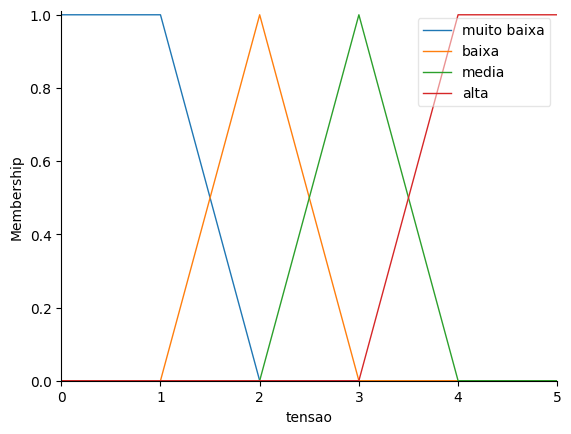

In [ ]:
tensao['muito baixa'] = fuzz.trapmf(tensao.universe, [0,0, 1, 2])
tensao['baixa'] = fuzz.trimf(tensao.universe, [1,2,3])
tensao['media'] = fuzz.trimf(tensao.universe, [2,3,4])
tensao['alta'] = fuzz.trapmf(tensao.universe, [3,4,5,5])
tensao.view()

In [ ]:
regra1 = ctrl.Rule(temperatura['baixa']& umidade['baixa'],tensao['alta'])
regra2 = ctrl.Rule(temperatura['baixa']& umidade['media'],tensao['baixa'])
regra3 = ctrl.Rule(temperatura['baixa']& umidade['alta'],tensao['muito baixa'])
regra4 = ctrl.Rule(temperatura['media']& umidade['baixa'],tensao['alta'])
regra5 = ctrl.Rule(temperatura['media']& umidade['media'],tensao['baixa'])
regra6 = ctrl.Rule(temperatura['media']& umidade['alta'],tensao['muito baixa'])
regra7 = ctrl.Rule(temperatura['alta']& umidade['baixa'],tensao['alta'])
regra8 = ctrl.Rule(temperatura['alta']& umidade['media'],tensao['media'])
regra9 = ctrl.Rule(temperatura['alta']& umidade['alta'],tensao['muito baixa'])

In [ ]:
irrigador_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6,regra7,regra8,regra9])
irrigacao = ctrl.ControlSystemSimulation(irrigador_ctrl)

4.222222222222222


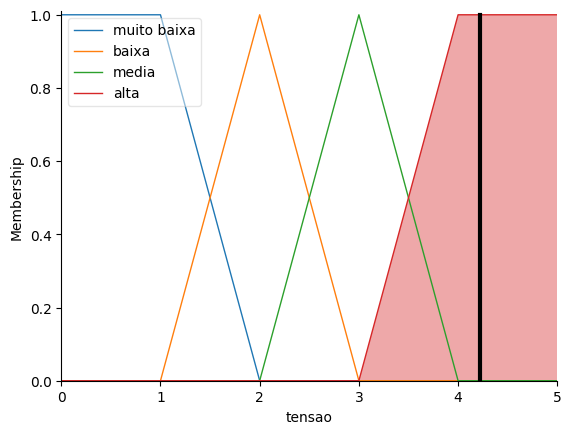

In [ ]:
irrigacao.input['temperatura'] = 15
irrigacao.input['umidade'] = 20
irrigacao.compute()
print (irrigacao.output['tensao'])
tensao.view(sim=irrigacao)